In [1]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors
import geopandas
import shapely
import cmocean
import pandas
import joblib

In [10]:
et_npy_file_list = sorted(glob.glob('CAL_LID_L2_05kmCPro-Standard-V4-10*'))

In [31]:
# open first collection
f = 3
et_file_list = numpy.load(et_npy_file_list[f])

In [32]:
sum([l.__len__() for l in et_npy_file_list])

1504

In [36]:
gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = 
gdal_tbc_ds.ReadAsArray()

SyntaxError: invalid syntax (<ipython-input-36-79ae3457bc0b>, line 2)

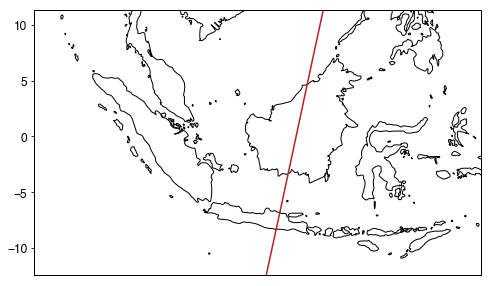

In [37]:
ds = xarray.open_dataset(et_file_list[0])

lat = ds['Latitude'].sel(fakeDim3=1).values
lon = ds['Longitude'].sel(fakeDim5=1).values


#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

plot multiple at once

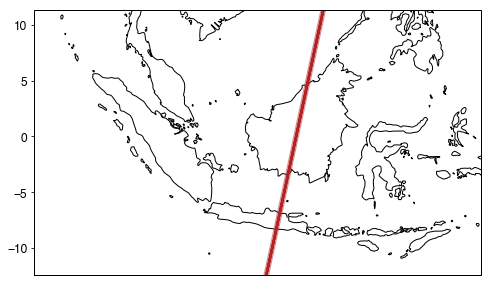

In [35]:
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

for file in et_file_list[:20]:
    ds = xarray.open_dataset(file)
    lat = ds['Latitude'].sel(fakeDim3=1).values
    lon = ds['Longitude'].sel(fakeDim5=1).values
    ax.plot(lon,lat,c='firebrick')
    ds.close()
    
    if file==et_file_list[0]:
        base_track_geom = shapely.geometry.LineString(zip(lon,lat))

base_track_geom_buffer = base_track_geom.buffer(0.25)
ax.add_geometries([base_track_geom_buffer], crs=cartopy.crs.PlateCarree(), facecolor='firebrick', alpha=0.5)

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [38]:
et_file_list.__len__()

248

In [ ]:
et_file_list